In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

1) Build spin operator matrices

In [2]:
Ix = 1/2*np.array([[0,1],[1,0]])
Iy = 1/2*np.array([[0,-1j],[1j,0]])
Iz = 1/2*np.array([[1,0],[0,-1]])
E  = np.eye(2)

In [3]:
I1x = np.kron(Ix,E)
I2x = np.kron(E,Ix)
I1y = np.kron(Iy,E)
I2y = np.kron(E,Iy)
I1z = np.kron(Iz,E)
I2z = np.kron(E,Iz)

2) Set Hamiltonian parameters and build the matrix

In [4]:
offset1 = 4e3 # offset 1
offset2 = -3e3 # offset 2
J = 200


H0 = offset1*I1z + offset2*I2z + J*(I1x*I2x + I1y*I2y + I1z*I2z)

3) Set simulation parameters

In [7]:
rho0 = I1z+I2z # starting density operator
pulseOp = (I1y + I2y) # pulse operator
detOp = (I1x+I2x)+1j*(I1y+I2y)  # detection operator

dt = 50e-6 # sampling step, "dwell time"
nPoints = 4096 # length of acquisition
t = np.arange(nPoints)*dt # time vector

sig = np.zeros(nPoints,dtype=complex) # pre-allocation of signal vector


4) Actual simulation

In [10]:
rho=rho0

# apply pulse propagator to initial density operator
Upulse = expm(-1j*np.pi/2*pulseOp);
rho = Upulse@rho@Upulse.T.conj();

# build propagator of free evolution, and acquire
U0 = expm(-1j*2*np.pi*H0*dt);
for it in range(nPoints):
   sig[it] = np.trace(detOp@rho) # detect
   rho = U0@rho@U0.T.conj() # propagation

Plot real and imaginary parts

(0.0, 204.75000000000003)

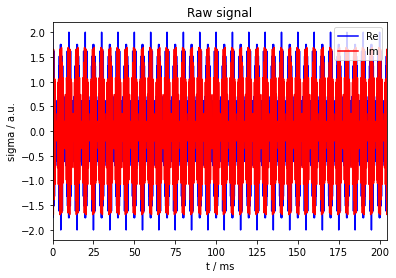

In [11]:
ax=plt.figure().add_subplot(111)
ax.set_title('Raw signal')
ax.plot(t*1e3,sig.real,color='blue')
ax.plot(t*1e3,sig.imag,color='red')
ax.set_xlabel('t / ms')
ax.set_ylabel('sigma / a.u.')
ax.legend(['Re','Im'])
ax.set_xlim([0,t[-1]*1e3])

Apodize, i.e. multiply with window function

(0.0, 204.75000000000003)

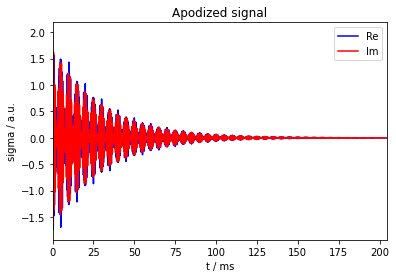

In [12]:
twin = 30e-3  #Apodization parameter
win = np.exp(-t/twin)

sig_apo = sig*win #Apply window to signal

ax=plt.figure().add_subplot(111)
ax.set_title('Apodized signal')
ax.plot(t*1e3,sig_apo.real,color='blue')
ax.plot(t*1e3,sig_apo.imag,color='red')
ax.set_xlabel('t / ms')
ax.set_ylabel('sigma / a.u.')
ax.legend(['Re','Im'])
ax.set_xlim([0,t[-1]*1e3])

Fourier transform with zero-filling, construction of frequency vector

(-10.0, 9.99755859375)

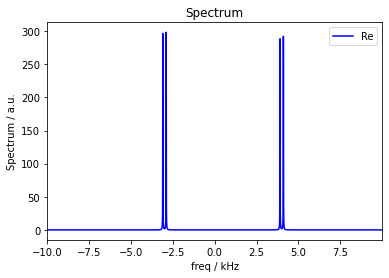

In [13]:
#fft with zerofilling two twice the original points
sig_apo[0]/=2
spec = np.fft.fftshift(np.fft.fft(sig_apo,2*nPoints));

#frequency vector
N=len(spec)
nyqFreq = 1/(2*dt)
unitAxis = 2/N * (np.arange(N)-np.fix(N/2))
freq = nyqFreq * unitAxis;

ax=plt.figure().add_subplot(111)
ax.set_title('Spectrum')
ax.plot(freq/1e3,spec.real,color='blue')
#ax.plot(freq/1e3,spec.imag,color='red')
#ax.plot(freq/1e3,np.abs(spec),color='black',linestyle='--')
ax.set_xlabel('freq / kHz')
ax.set_ylabel('Spectrum / a.u.')
ax.legend(['Re','Im','Abs'])
ax.set_xlim([freq[0]/1e3,freq[-1]/1e3])